In [1]:
!pip install gym[toy_text]
!pip install colorama

!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from IPython.display import clear_output

from time import sleep

In [2]:
import pandas as pd

In [3]:
env = gym.make("Taxi-v3")
env.reset()
print(env.render('ansi'))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




**state**:  the location on the grid (a row and a column number between 0 and 4), a location to drop-off the passenger from four choices, and the passenger which can be in one of the four locations or inside the taxi.

**action:** there are six possible actions. with your taxi, you can try to move to the four cardinal directions : South, North, East or West. It does not mean that the move is allowed neither possible. There are also two other possible actions which are the pick-up or the drop-off for a great total of six actions.

0 = South

1 = North

2 = East

3 = West

4 = Pickup

5 = Dropoff

**rewar:**


**Random Based Learning**

we define a function called "random based learning". it gets the number of episodes as input and repeats the random based alogrithm in each episode. so in each episode, after reseting the states, we randomly samples an action untill we reaches the goal. we also count the number of times we choose an action(total step size) and the sum of all awards in each episode

In [4]:
def random_based_learning(num_episode):
  env = gym.make("Taxi-v3").env
  epiod_rewards = np.zeros(num_episode)
  episod_stepsize = np.zeros(num_episode)
  episod_penalties = np.zeros(num_episode)

  for episode in range(num_episode):
    env.reset()
    done=0

    while not done:
      action = env.action_space.sample()
      state, reward, done, info = env.step(action)

      epiod_rewards[episode] += reward
      episod_stepsize[episode] += 1
      if reward == -10:
          episod_penalties[episode] += 1

    
  return epiod_rewards, episod_stepsize, episod_penalties

**Q learning algorithm**

In this algorithm we define a table that stores the state action value of each acstion-state pair. untill convergence we choose an action for each state based on the Q table and update the Q table based on the chosen action.

**Epsilon Greedy**


 

exploration allows an agent to improve its current knowledge about each action, hopefully leading to long-term benefit.exploitation on the other hand, chooses the greedy action to get the most reward by exploiting the agent’s current action-value estimates. but by being greedy with respect to action-value estimates, may not actually get the most reward and lead to sub-optimal behaviour.epsilon-Greedy is a simple method to balance exploration and exploitation by choosing between exploration and exploitation randomly.

we define a function called "choose next_action". it gets the Q table, a specific state, and epsilon. it returns the next action taken in state s.
we sample a random number from $rand \in U[0,1]$.

1.   $if\ rand<ϵ:a=argmax_a Q(s,a) $ 

     we do  exploitation with probability of $1-ϵ$. which means we choose the best action for our state.
2.   $o.w:\ a\in A(s)$.

     we do exploration with probability of $ϵ$. which means we choose a random action from all possible actions of state $s$.





In [5]:
def choose_next_action(Q, state,epsilon,env):
  random_num=random.uniform(0,1)
  if( random_num> epsilon):
    action = np.argmax(Q[state])
  
  else:
    action = env.action_space.sample()
  
  return action

**Q-Learning** 

Q-Learning is a basic form of Reinforcement Learning which uses Q-values to iteratively improve the behavior of the learning agent.

we define a function called "q-learning" that gets the number of episodes and executes the q-learning algorithm:

first we initialize our environment and create a Q table that each row represents a state and each column represents an action. we initilaize our Q table with 0. we also crate an array to store the total reward and step size in each episode.

in each episode, after resetting the environment, we follow the steps below untill we reach our goal state:

1.   choose the next action based on the current state and the Q table, using the "choose_next_action" function.
2.   by taking the new action, find the new state and reward.
3.   update the Q table using the furmula below:



*   $Q(s,a)=َQ(s,a)+ \alpha [r + \gamma\  max_{a'}Q(s',a') - Q(s,a)]$

*    $\alpha$ is the learning rate. it determines to what extent newly acquired information overrides old information. we first set $\alpha=1$ and at each episode we make it a little smaller($\alpha_{new}=0.99*\alpha$
*   $\gamma$ is the discount factor. it determines the importance of future rewards. we set $\gamma=0.9$
*   $s'$, $a'$ are the new state and action
*   $s$, $a$ are the current  state and action
*   $r$ is the immediate reward that is given by taking action $a$ in state $s$
*   we can interpret $r + \gamma\  max_{a'}Q(s',a')$ as a noisy sample of Q value based on the next state.

\
4.  we also count the number of times we choose an action(total step size) and the 

5. as said before, the "choose_next_action" function chooses the next action based on the Q table with probability of $1- \epsilon$ and chooses a random action with probability of $\epsilon$. as the Q table is updated and the agent learns in each episode, we need more exploitation and less exploration, so we make $\epsilon $ smaller at each episode($\epsilon_{new}=0.9 \epsilon$)

the number of episodes should be large enough so the Q table converges.





    






In [6]:
def q_learning(num_episode,epsilon=1,gamma = 0.9, alpha = 1):
    env = gym.make("Taxi-v3").env
    env.reset()
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    episode_reward= np.zeros(num_episode)
    episode_step_size = np.zeros(num_episode)
    episod_penalties = np.zeros(num_episode)
    for episode in range(num_episode):
        state = env.reset()
        step = 0
        done = 0
        
        while not done:
            action = choose_next_action(q_table, state,epsilon,env)
            new_state, reward, done, info = env.step(action)
            episode_reward[episode] += reward
            episode_step_size[episode] += 1
            if reward == -10:
               episod_penalties[episode] += 1
            q_table[state][action] = q_table[state][action] + alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state][action])
            state=new_state
        epsilon *= 0.9
        alpha *= 0.99

    return q_table, episode_reward, episode_step_size,episod_penalties

**Enhanced Q learning**

since the q learning method chooses the frist actions mostly randomly, one way to improve the algorithm and make it morestable, is to repeat the algorithm and average all the results.

In [7]:
def enhanced_q_learning(num_rep,num_episode,epsilon=1,gamma = 0.9, alpha = 1):
    ave_q_table, ave_episode_reward, ave_episode_step_size, ave_episod_penalties=q_learning(num_episode,epsilon,gamma , alpha )
    for i in range(num_rep-1):
        q_table, episode_reward, episode_step_size, episod_penalties= q_learning(num_episode,epsilon,gamma , alpha )
        ave_q_table+=q_table
        ave_episode_reward+=episode_reward
        ave_episode_step_size+=episode_step_size
        ave_episod_penalties+=episod_penalties

    ave_q_table=ave_q_table/num_rep
    ave_episode_reward=ave_episode_reward/num_rep
    ave_episode_step_size=ave_episode_step_size/num_rep
    ave_episod_penalties=ave_episod_penalties/num_rep


    return ave_q_table, ave_episode_reward, ave_episode_step_size,ave_episod_penalties

**Run Policy**

we define a fuunction a function called "run policy". it gets the method and the Q table. after resetting the environment, if the method is random search, it samples a random action untill reaches the goal, and if the method is Q learning, the action with the most state action value is chosen each time untill reaches the goal.(since the Q table has converged, the best action is chosen each time)

In [8]:
def run_policy(method,q_table):
     env = gym.make("Taxi-v3")
     state=env.reset()
     Frames = []
     total_reward = 0
     done = 0
     while not done:
         if (method == "random"):
             action=env.action_space.sample() 
         else:
             action=np.argmax(q_table[state])
         state, reward, done, info = env.step(action)  
         total_reward += reward
         Frames.append({'frame': env.render(mode='ansi'),'state': state,
         'action': action,'reward': total_reward})
     return Frames    

In [32]:
def show_results( reward_eposid, Step_size_episoede, episod_penalties,method):
  

  n=len(reward_eposid)
  plt.figure(figsize=(n*10, n*8)) 
  for i in range(n):
      plt.subplot(3, 3, 3*i+1)
      plt.plot(reward_eposid[i])
      plt.xlabel('episode')
      plt.ylabel('reward')
      plt.title('reward per episode using '+method[i])
      

      plt.subplot(3, 3, 3*i+2)
      plt.plot(Step_size_episoede[i])
      plt.xlabel('episode')
      plt.ylabel('step size')
      plt.title('step size per episode using '+method[i])
      

      plt.subplot(3, 3, 3*i+3)
      plt.plot(episod_penalties[i])
      plt.xlabel('episode')
      plt.ylabel('penalty ')
      plt.title('penalty per episode using '+method[i])
      

In [10]:
def print_frames(frames,method):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(method)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(1)

we iterate each algorithm for 600 episodes, we also set the number of repeats(for the enhanced Q learning) to 30

In [11]:
num_episode=600
num_rep=30

In [ ]:
epiod_rewards, episod_stepsize, episod_penalties = random_based_learning(num_episode)

In [13]:
q_table, q_episode_reward, q_episode_step_size, q_episod_penalties = q_learning(num_episode)

In [14]:
ave_q_table, ave_q_episode_reward, ave_q_episode_step_size, ave_q_episod_penalties = enhanced_q_learning(num_rep,num_episode)

In [ ]:
mean_reward=[np.mean(epiod_rewards), np.mean(q_episode_reward), np.mean(ave_q_episode_reward)]
mean_step=[np.mean(episod_stepsize), np.mean(q_episode_step_size), np.mean(ave_q_episode_step_size)]
mean_penalty=[np.mean(episod_penalties), np.mean(q_episod_penalties), np.mean(ave_q_episod_penalties)]
methods=["random search", "Q learning", "enhanced Q learning"]

In [ ]:
df=pd.DataFrame({"method":methods, "average reward":mean_reward, "average step size":mean_step, "average penalty":mean_penalty})


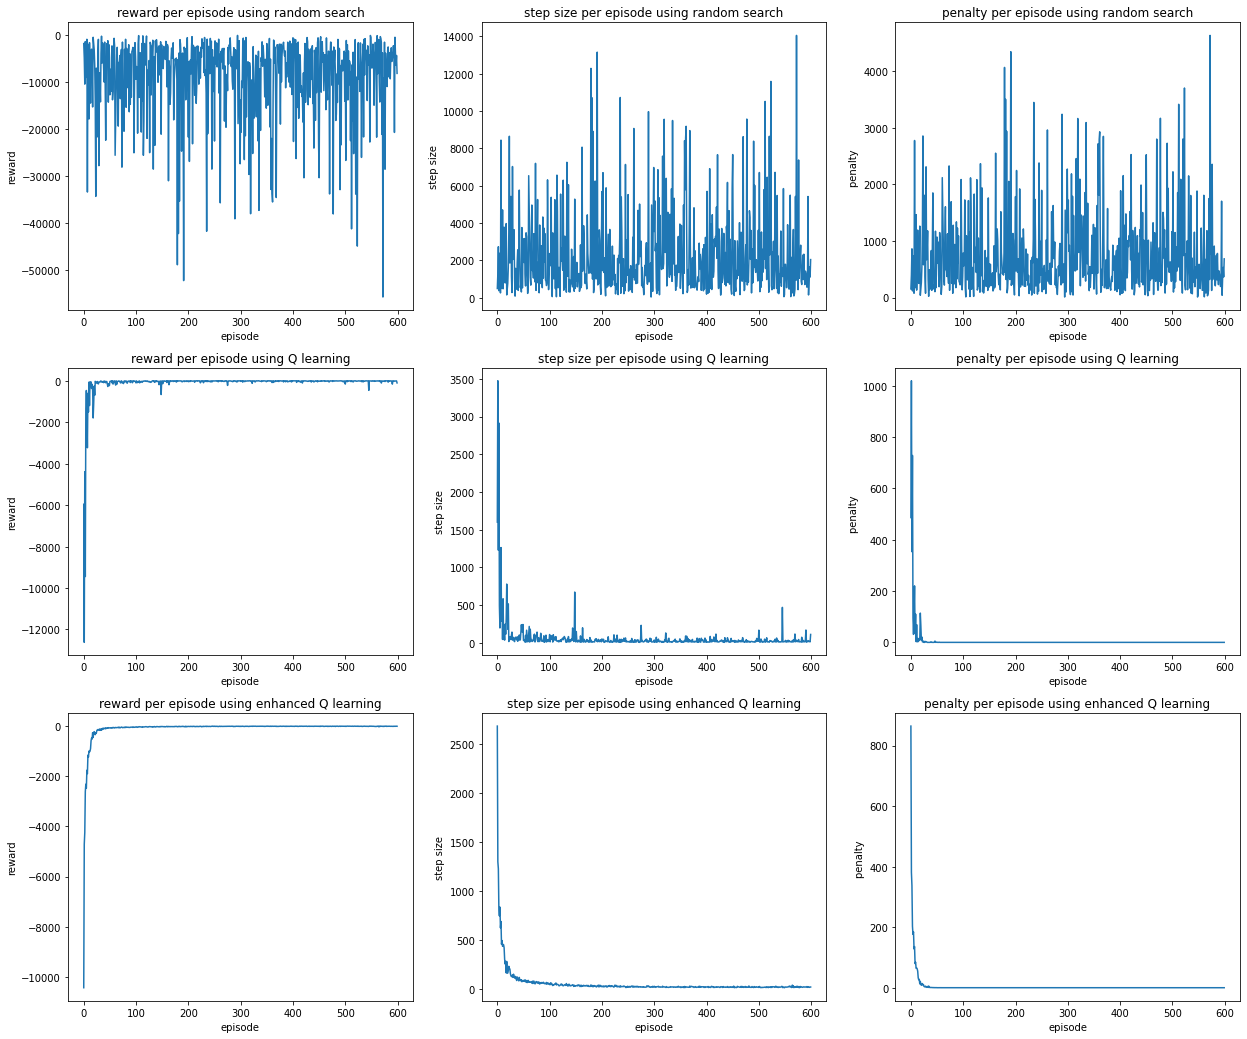

In [ ]:
methods=["random search", "Q learning", "enhanced Q learning"]
all_reward=[epiod_rewards, q_episode_reward, ave_q_episode_reward]
all_step=[episod_stepsize, q_episode_step_size, ave_q_episode_step_size]
all_penalty=[episod_penalties, q_episod_penalties, ave_q_episod_penalties]
show_results( all_reward, all_step, all_penalty, methods)

In [ ]:
df

method  average reward  average step size  average penalty
0        random search    -9010.641667        2308.146667       747.055000
1           Q learning      -92.466667          60.111667         5.928333
2  enhanced Q learning      -81.373611          56.646611         5.080778

**Random Search**:

as we can see the amount of total reward, step size, and number of penalties has a lot of varience.the plots are very noisy, becouse the actions are completely random and the driver learns nothing in each episod. in some cases, the driver randomly reaches his goal soon so the reward is high and the step size and the number of penalties are low. but in a lot of cases, he cannot reach his goal soon so the reward is low and the step size and the number of penalties are high. we can see that the average reward of this methode is significently smaller than the other methodes, and the average step size and the average number of penalties are also significently larger in this method.

**Q Learning**: 

as we can see, total reward increases quickly over the first few episodes and the plot converges. the reward and number of penalties also decrease quickly in the first few episodes and the plots converge. this is becouse the Q table is updated over the ations of the episodes andconverges quickly. so the driver learns much faster how to drive. there is a little noise in all three plots becouse the algorithm sometimes chooses a random action (becouse of the epsilon greedy algorithm). we can also see that  the averege reward of this method is significently smaller than the random method. also the average step size and the average number of penalties are also significently smaller than the random method.

**Enhanced Q Learning**:

as we can see the plots of this method are smoother then the Q learning method. becouse in this method, we executed the Q learning algorithm multiple times and used the average of the parameters. so this method is more stable. also this method has the largest average of total reward and the smallest average step size and number of penalties



**Testing the Policy:**

we test each policy, using the "run_policy" function

In [ ]:
frames_random=run_policy("random",0)
print_frames(frames_random,"random search")


random search
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Timestep: 200
State: 314
Action: 4
Reward: -704


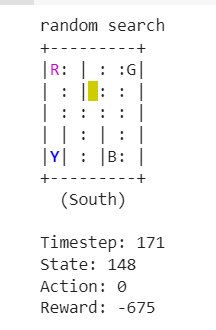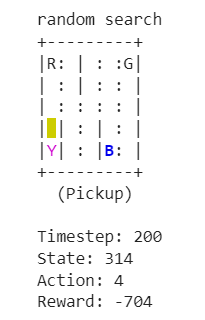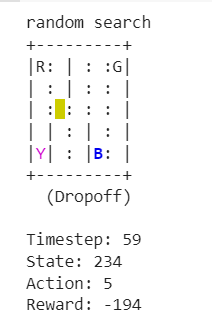

as we can see, since the policy is random actions, the time step it very big and the award is very small

In [15]:
frames_q=run_policy("qlearning",q_table)
print_frames(frames_q,"Q learning")

Q learning
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 12
State: 0
Action: 5
Reward: 9


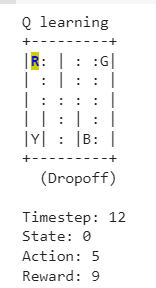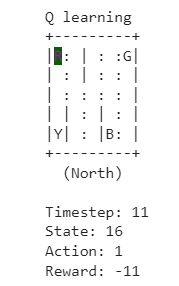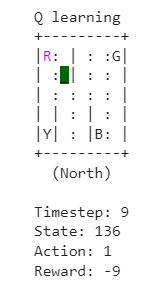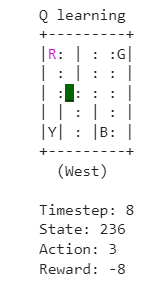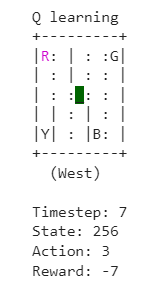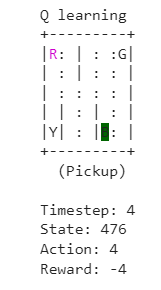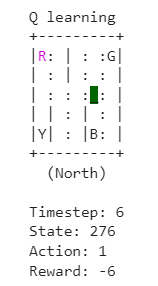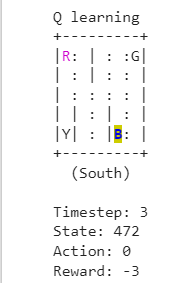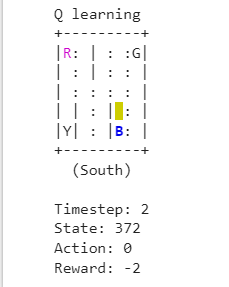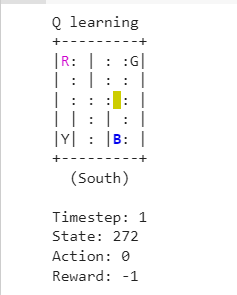

as we can see, the driver completes the task correctly in only 12 steps and his total reward is +20-11=9. so the q learning algorithm is much better than random search and is optimal
  

In [15]:
frames_q_ave=run_policy("aveqlearning",ave_q_table)
print_frames(frames_q_ave,"enhanced Q learning")

enhanced Q learning
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 12
State: 85
Action: 5
Reward: 9


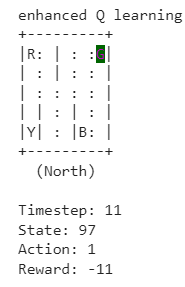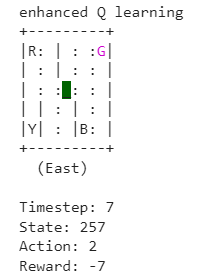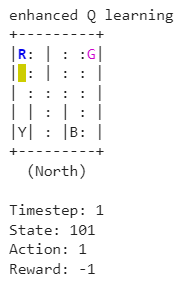

as we can see, the driver completes the task correctly in only 12 steps and his total reward is +20-11=9. so the enhanced q learning algorithm is not only stable, but the policy is also optimal

**changing the rewards**:



we scale the reward of our goal state by 20, and double the reward of each move so the drivers award decreases much more in each state, we also scale the reward of dropping off in a wrong state by 4 so the drivers award decreases much more. 

In [37]:
def q_learning_changed(num_episode,epsilon=1,gamma = 0.9, alpha = 1):
    env = gym.make("Taxi-v3").env
    env.reset()
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    episode_reward= np.zeros(num_episode)
    episode_step_size = np.zeros(num_episode)
    episod_penalties = np.zeros(num_episode)
    for episode in range(num_episode):
        state = env.reset()
        step = 0
        done = 0
        
        while not done:
            action = choose_next_action(q_table, state,epsilon,env)
            new_state, reward, done, info = env.step(action)
            if reward==20:
                reward_changed=reward*20
            elif reward==-1:
                reward_changed=reward*2
            elif reward==-10:
                reward_changed=reward*4

            episode_reward[episode] += reward_changed
            episode_step_size[episode] += 1
            if reward == -10:
               episod_penalties[episode] += 1
            q_table[state][action] = q_table[state][action] + alpha * (reward_changed + gamma * np.max(q_table[new_state]) - q_table[state][action])
            state=new_state
        epsilon *= 0.9
        alpha *= 0.99

    return q_table, episode_reward, episode_step_size,episod_penalties

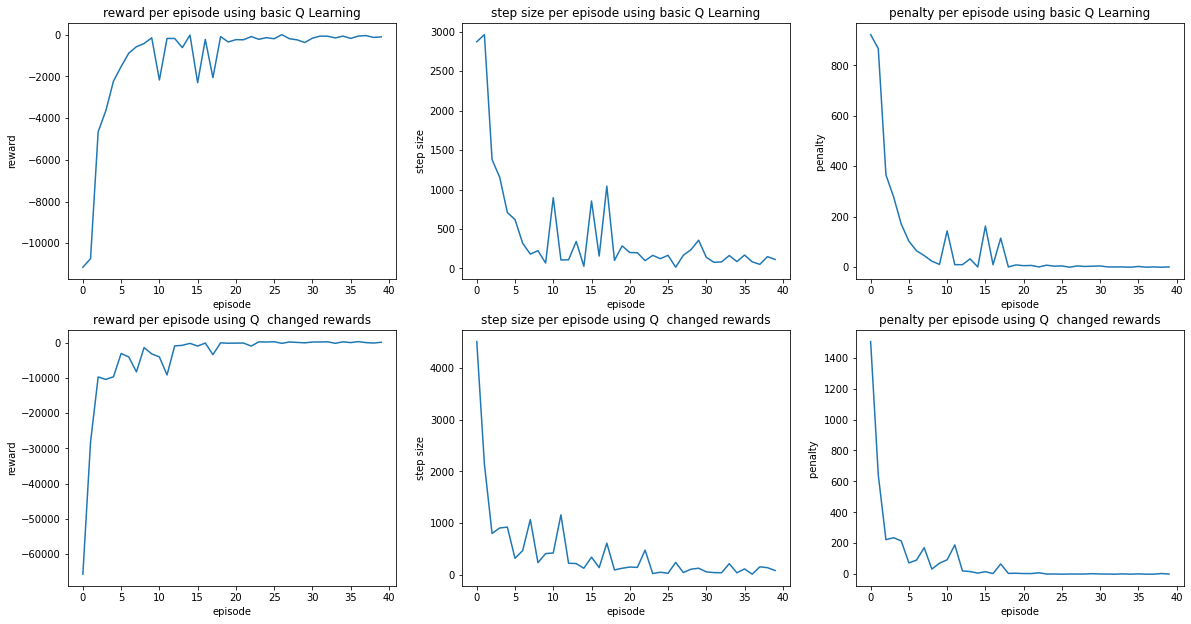

In [39]:
num_episode=40
q_table, q_episode_reward, q_episode_step_size, q_episod_penalties = q_learning(num_episode)
ch_q_table, ch_q_episode_reward, ch_q_episode_step_size, ch_q_episod_penalties = q_learning_changed(num_episode)

reward_eposid=[q_episode_reward, ch_q_episode_reward]
Step_size_episoede=[q_episode_step_size, ch_q_episode_step_size]
episepisod_penaltiesod_penalties=[q_episod_penalties, ch_q_episod_penalties]
method=["basic Q Learning", "Q  changed rewards"]
show_results( reward_eposid, Step_size_episoede, episepisod_penaltiesod_penalties,method)

we trained both Q tables in 50 episodes.

since the rewards are differnt the scale of rewars are different in the methods. but the other two have the same scale.

we can see that by increasing the positive reward and decreasing the negative reward, we make the algorithm to avoid unwanted states. more and try harder to stay in  the wanted states.

the plots of the Q leaning method with changed awards are less noisy and the stays constant slightly sooner than the basic Q learning method with original award so the chnged reward has converged faster than the original one.

we can also say that by scaling the rewards reasonably, we increase the importance of the actions and prevent the action to be overshadowed by the noise of random actions. hence improving the convergence